In [39]:
import pandas as pd 
import numpy as  np 
import matplotlib.pyplot as  plt 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [5]:
cols=["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
path=r"C:\Users\ladom\Desktop\LLm\data\magic04.csv"
df=pd.read_csv(path, names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"]=(df["class"]=="g").astype(int) 
df

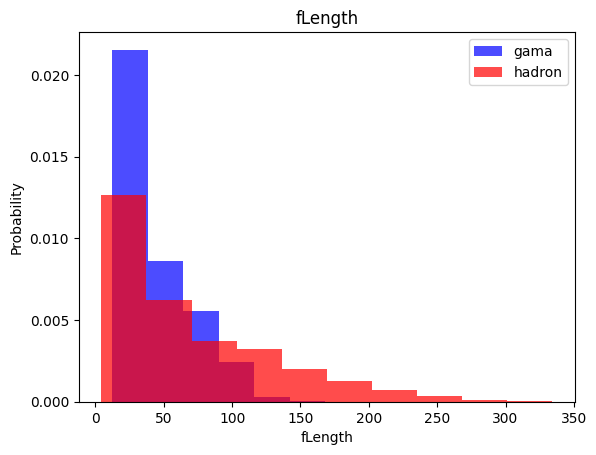

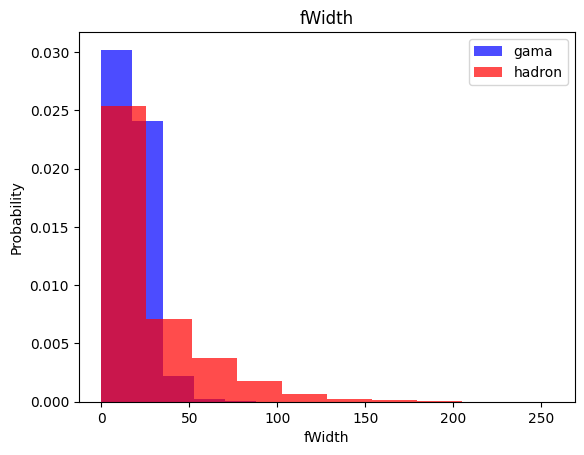

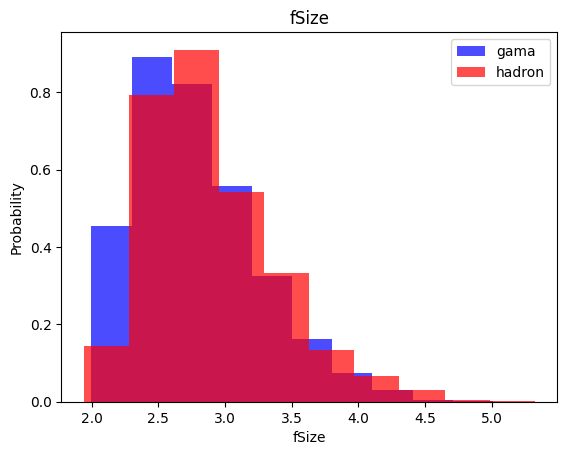

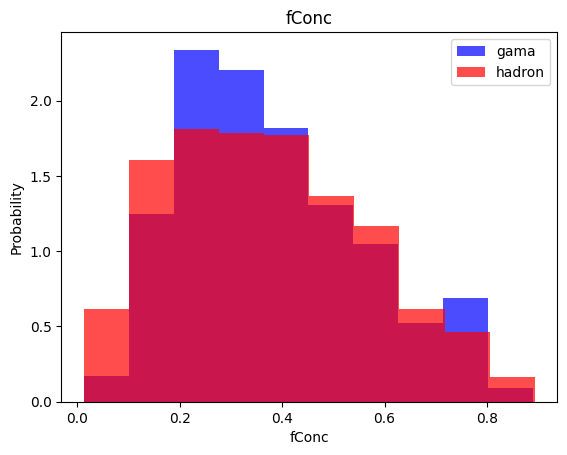

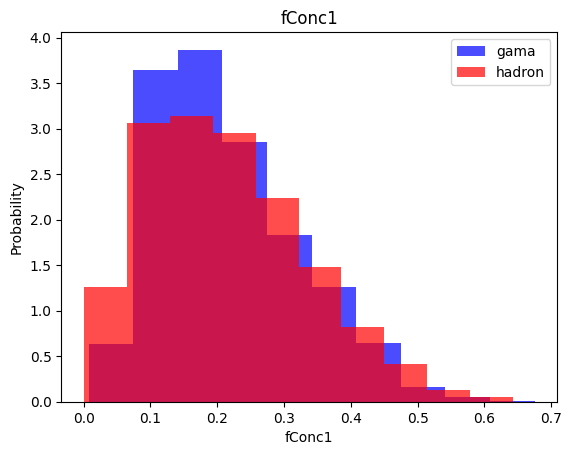

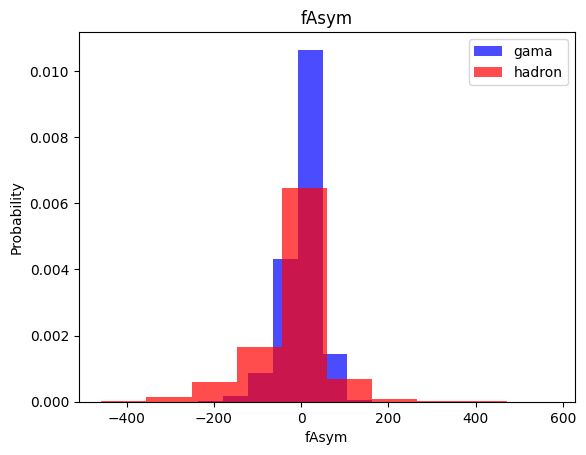

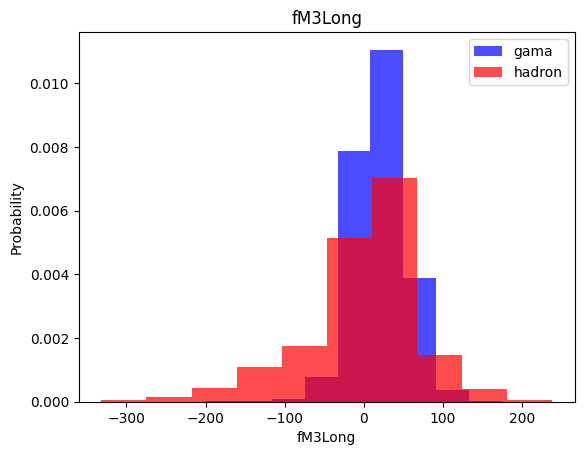

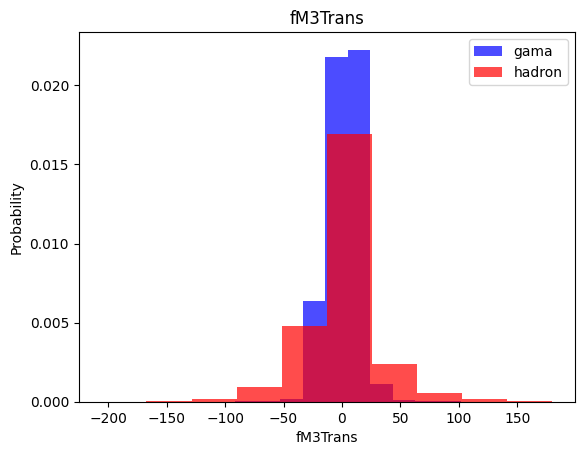

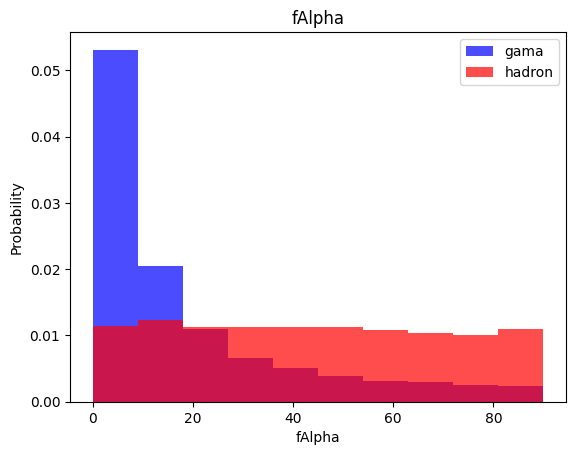

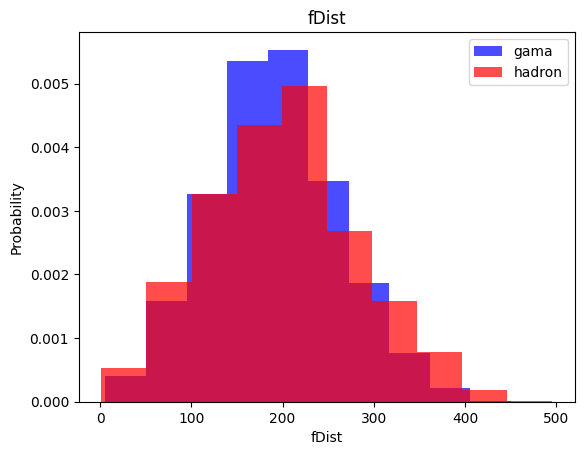

In [8]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label] ,color="blue", label="gama", alpha=0.7, density=True )
    plt.hist(df[df["class"]==0][label] ,color="red", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend() 
    plt.show()
    

# Train, Validation, test datasets 

In [57]:
train, valid, test= np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\ladom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [58]:
def scale_dataset(dataframe, oversample=False): 
    X=dataframe[dataframe.columns[:-1]].values 
    y=dataframe[dataframe.columns[-1]].values 
    
    scaler=StandardScaler() 
    X=scaler.fit_transform(X)
    
    if oversample:
        ros=RandomOverSampler() 
        X, y=ros.fit_resample(X,y)
    
    data=np.hstack((X, np.reshape(y, (-1,1))))
    
    return data, X, y

In [59]:
train, X_train, y_train=scale_dataset(train, oversample=True)
valid, X_valid, y_valid=scale_dataset(valid, oversample=False)
test, X_test, y_test=scale_dataset(test, oversample=False)

In [55]:
print(sum(y_train==1))
print(sum(y_train==0))

7400
7400


KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report

Knn_model=KNeighborsClassifier(n_neighbors=5)
Knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
y_pred=Knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1348
           1       0.85      0.87      0.86      2456

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB 

nb_model=GaussianNB()

nb_model.fit(X_train, y_train) 
y_pred=nb_model.predict(X_test) 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.40      0.50      1348
           1       0.73      0.88      0.80      2456

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.70      0.71      0.69      3804



Logistic Regresison

In [72]:
from sklearn.linear_model import LogisticRegression 

l_model=LogisticRegression() 

l_model.fit(X_train, y_train) 
y_pred=l_model.predict(X_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1348
           1       0.84      0.82      0.83      2456

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



SVM

In [73]:
from sklearn.svm import SVC 

svm_model=SVC()
svm_model.fit(X_train, y_train) 
y_pred=svm_model.predict(X_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1348
           1       0.90      0.89      0.89      2456

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Neural Networks

In [76]:
import tensorflow as tf 

In [104]:
def plot_loss(history):
    fig, (ax1, ax2)=plt.subplots(1,2, figsize=(12,6))
    ax1.plot(history.history["loss"], label="loss")
    ax1.plot(history.history["val_loss"], label="val_loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Binary crossentropy")
    ax1.legend() 
    ax1.grid(True) 
    
    ax2.plot(history.history["accuracy"], label="accuarcy")
    ax2.plot(history.history["val_accuracy"], label="val_accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.legend() 
    ax2.grid(True) 
    plt.show()
    

In [88]:
from tensorflow.keras.callbacks import EarlyStopping
import itertools 


In [96]:
def build_and_train(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size,epochs):
    nn_model=tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation="relu",input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation="relu"),
        tf.keras.layers.Dropout(dropout_prob), 
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    
    nn_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate), 
        loss="binary_crossentropy", metrics=["accuracy"]
    )
    
    early_stop=EarlyStopping(patience=5, restore_best_weights=True) 
    history= nn_model.fit(
        X_train ,y_train, 
        epochs=epochs, 
        batch_size=batch_size, 
        validation_split=0.2,
        callbacks=[early_stop], 
        verbose=0 # Make i tcleaner
    )
    return nn_model, history 

Training with {'num_nodes': 32, 'dropout_prob': 0, 'learning_rate': 0.001, 'batch_size': 32}


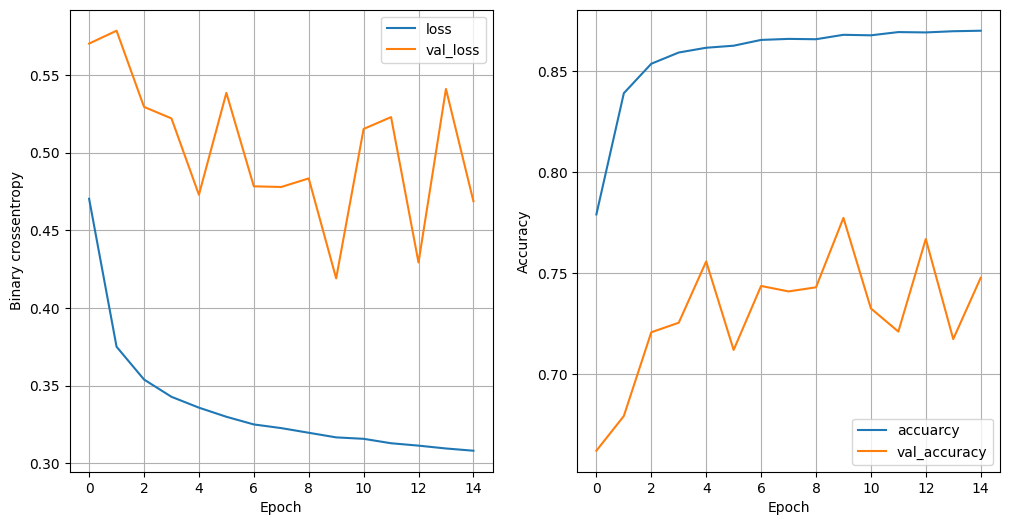

Validation Loss: 0.3389, Accuracy: 0.8528
Training with {'num_nodes': 32, 'dropout_prob': 0, 'learning_rate': 0.001, 'batch_size': 64}


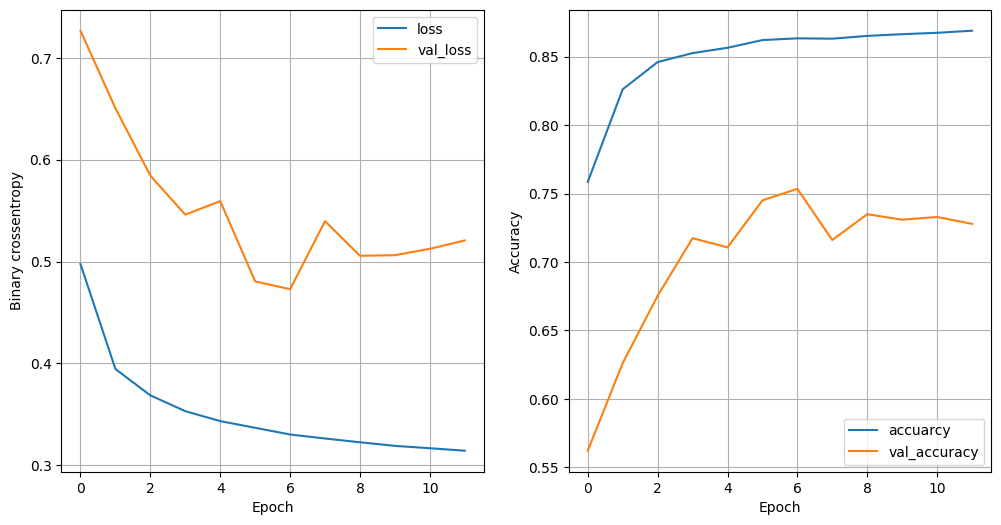

Validation Loss: 0.3370, Accuracy: 0.8541
Training with {'num_nodes': 32, 'dropout_prob': 0, 'learning_rate': 0.01, 'batch_size': 32}


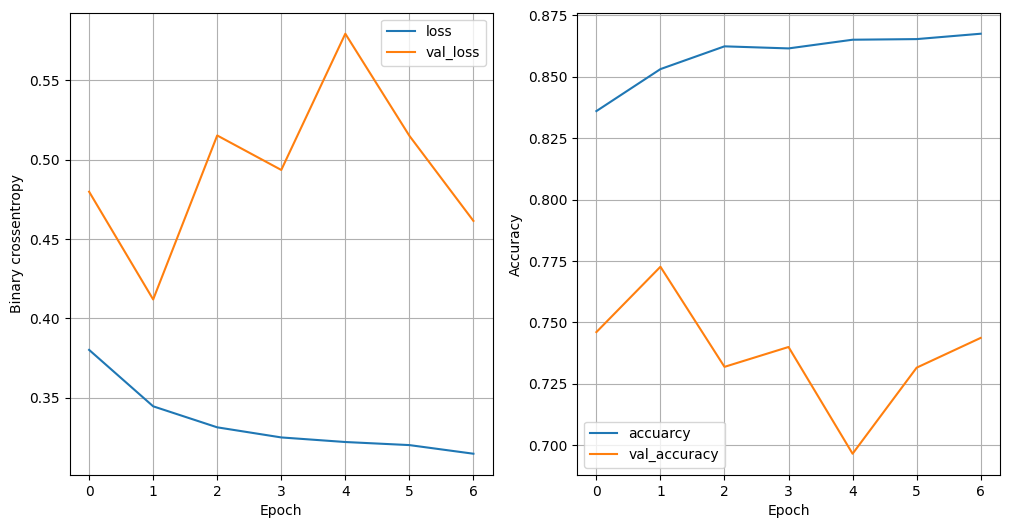

Validation Loss: 0.3448, Accuracy: 0.8509
Training with {'num_nodes': 32, 'dropout_prob': 0, 'learning_rate': 0.01, 'batch_size': 64}


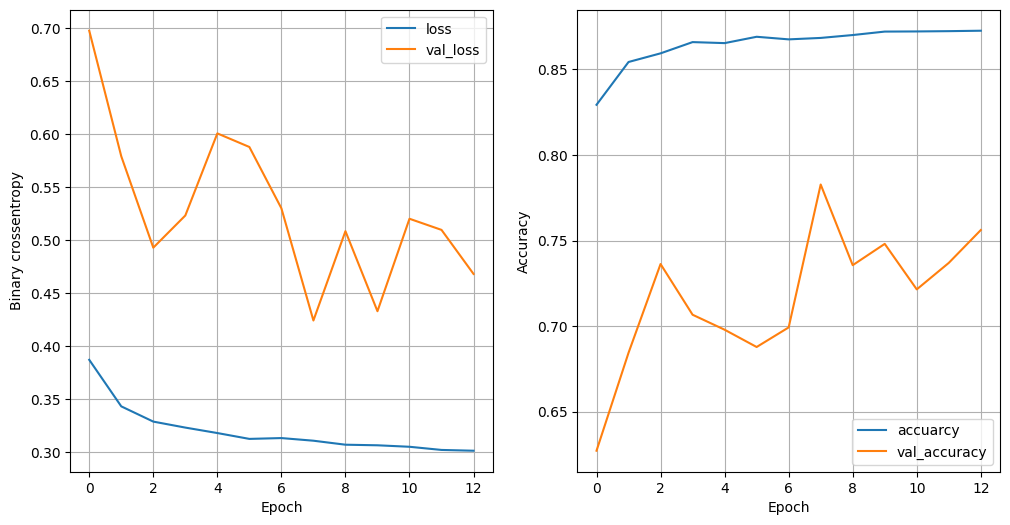

Validation Loss: 0.3322, Accuracy: 0.8554
Training with {'num_nodes': 32, 'dropout_prob': 0.2, 'learning_rate': 0.001, 'batch_size': 32}


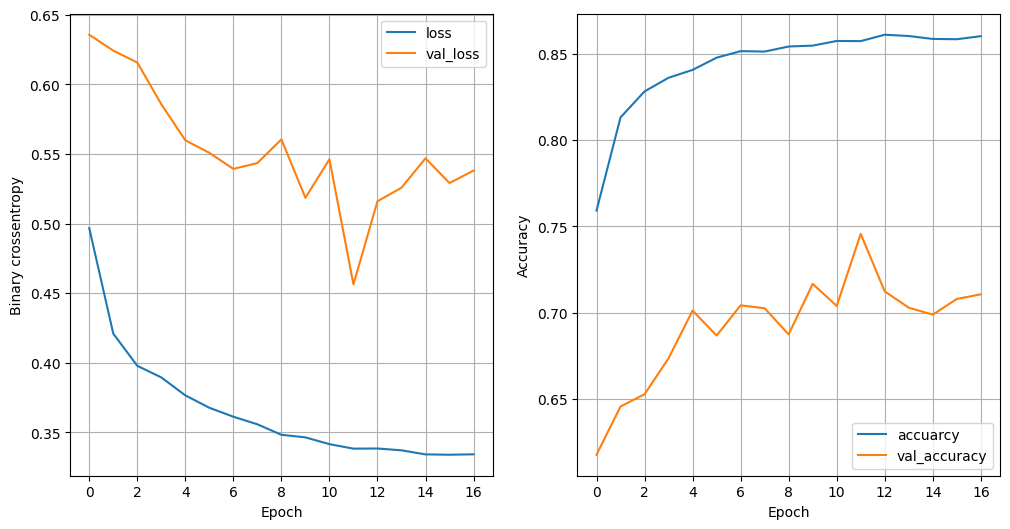

Validation Loss: 0.3354, Accuracy: 0.8559
Training with {'num_nodes': 32, 'dropout_prob': 0.2, 'learning_rate': 0.001, 'batch_size': 64}


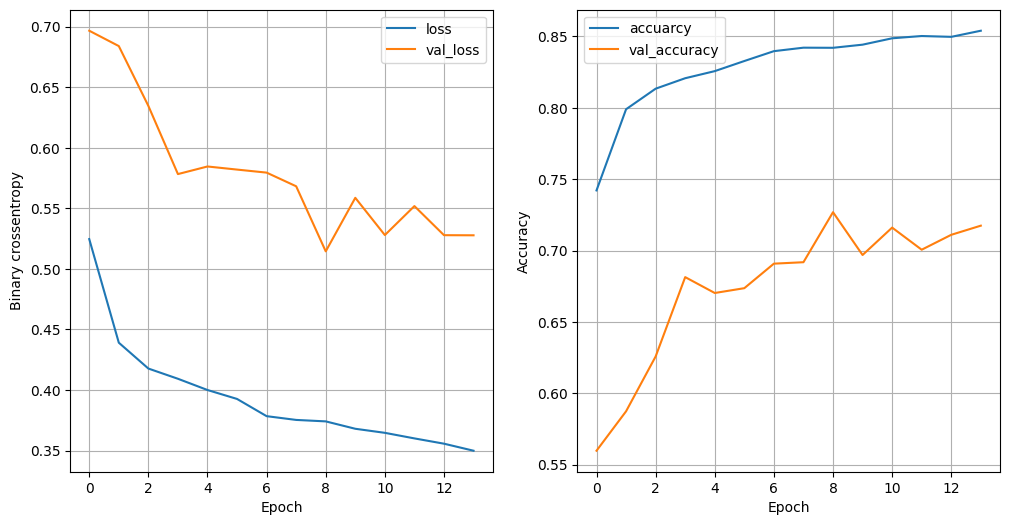

Validation Loss: 0.3503, Accuracy: 0.8528
Training with {'num_nodes': 32, 'dropout_prob': 0.2, 'learning_rate': 0.01, 'batch_size': 32}


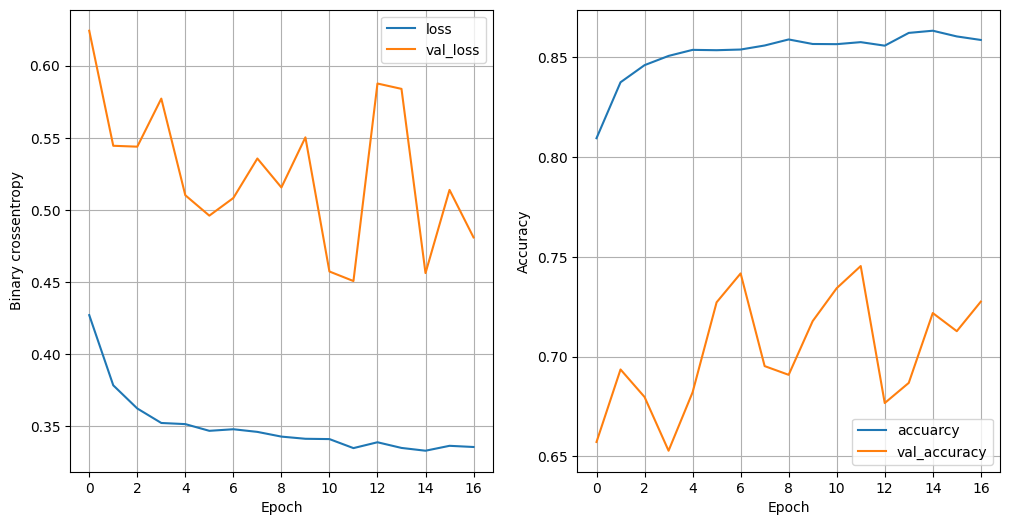

Validation Loss: 0.3359, Accuracy: 0.8565
Training with {'num_nodes': 32, 'dropout_prob': 0.2, 'learning_rate': 0.01, 'batch_size': 64}


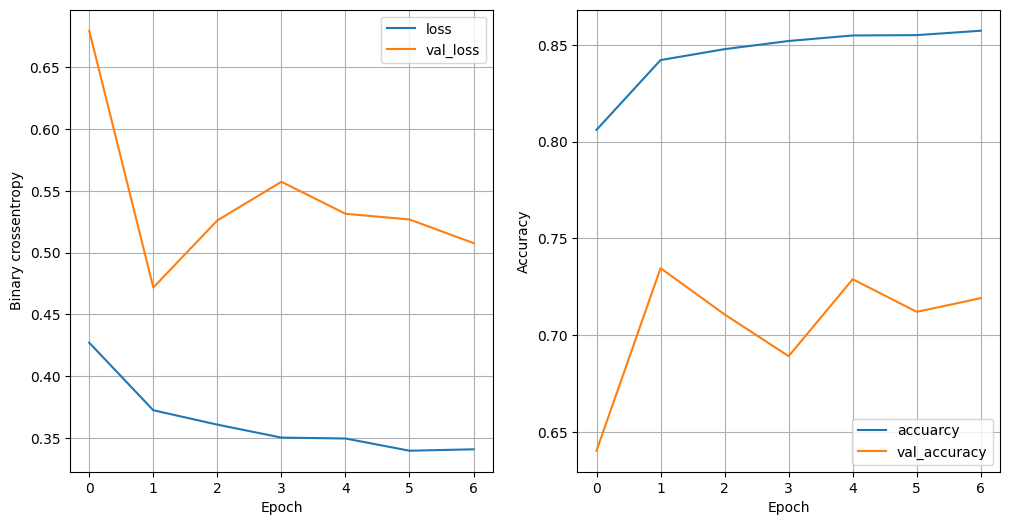

Validation Loss: 0.3543, Accuracy: 0.8504
Training with {'num_nodes': 64, 'dropout_prob': 0, 'learning_rate': 0.001, 'batch_size': 32}


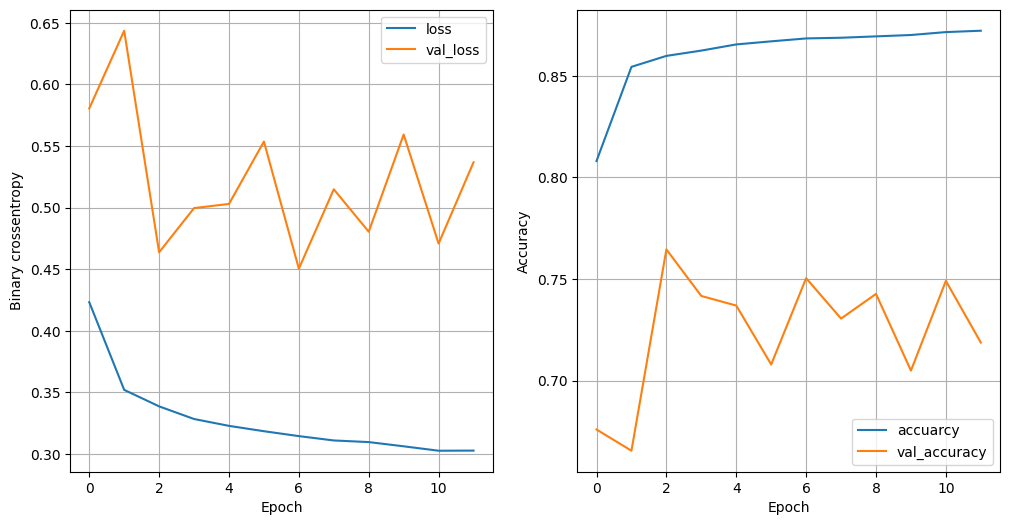

Validation Loss: 0.3295, Accuracy: 0.8591
Training with {'num_nodes': 64, 'dropout_prob': 0, 'learning_rate': 0.001, 'batch_size': 64}


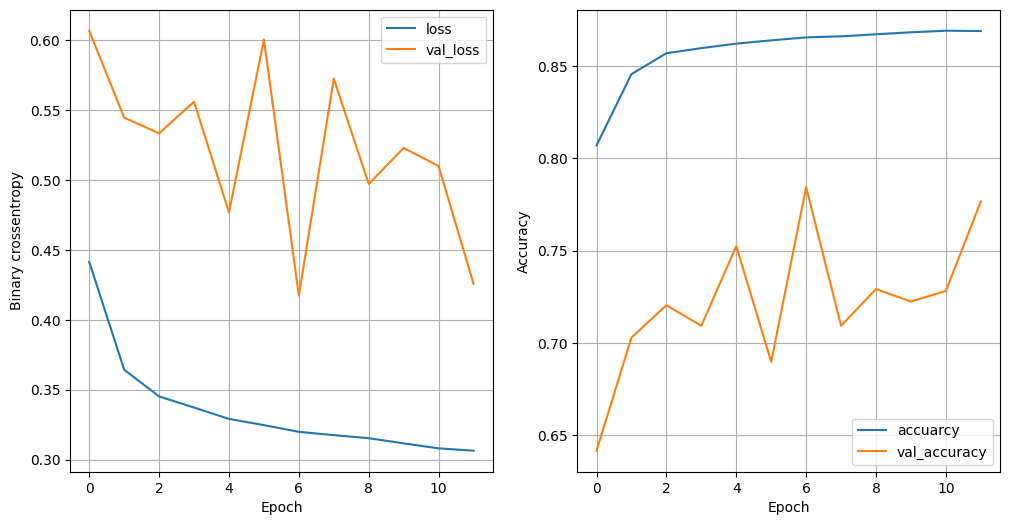

Validation Loss: 0.3460, Accuracy: 0.8475
Training with {'num_nodes': 64, 'dropout_prob': 0, 'learning_rate': 0.01, 'batch_size': 32}


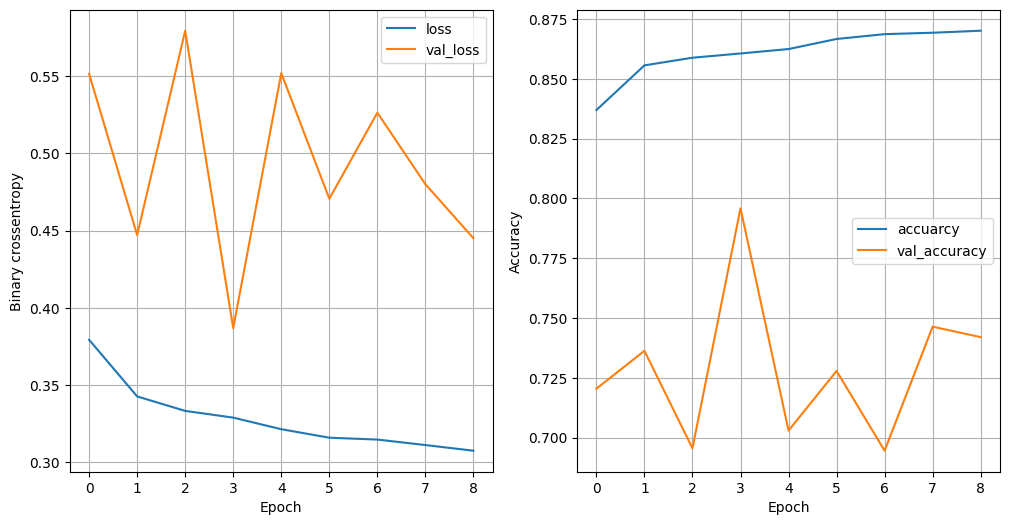

Validation Loss: 0.3471, Accuracy: 0.8499
Training with {'num_nodes': 64, 'dropout_prob': 0, 'learning_rate': 0.01, 'batch_size': 64}


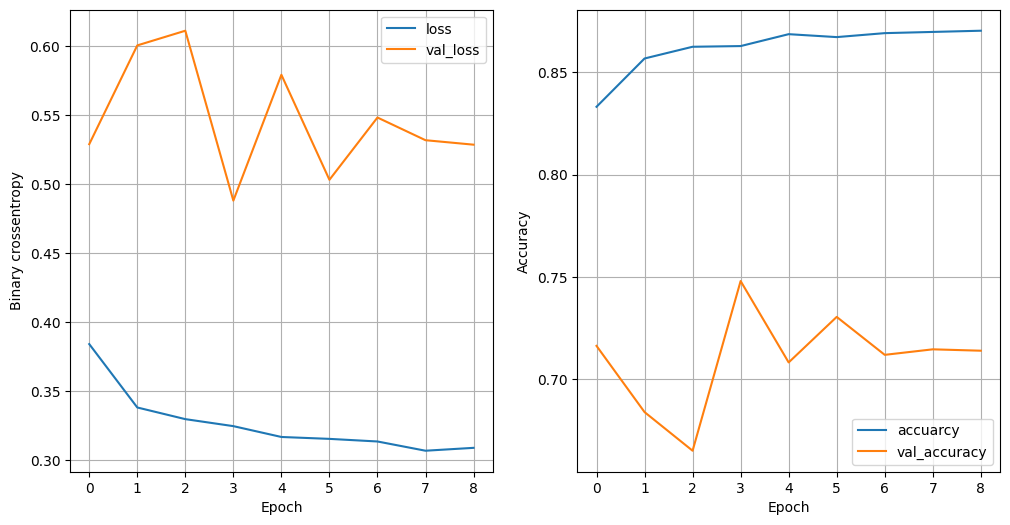

Validation Loss: 0.3295, Accuracy: 0.8594
Training with {'num_nodes': 64, 'dropout_prob': 0.2, 'learning_rate': 0.001, 'batch_size': 32}


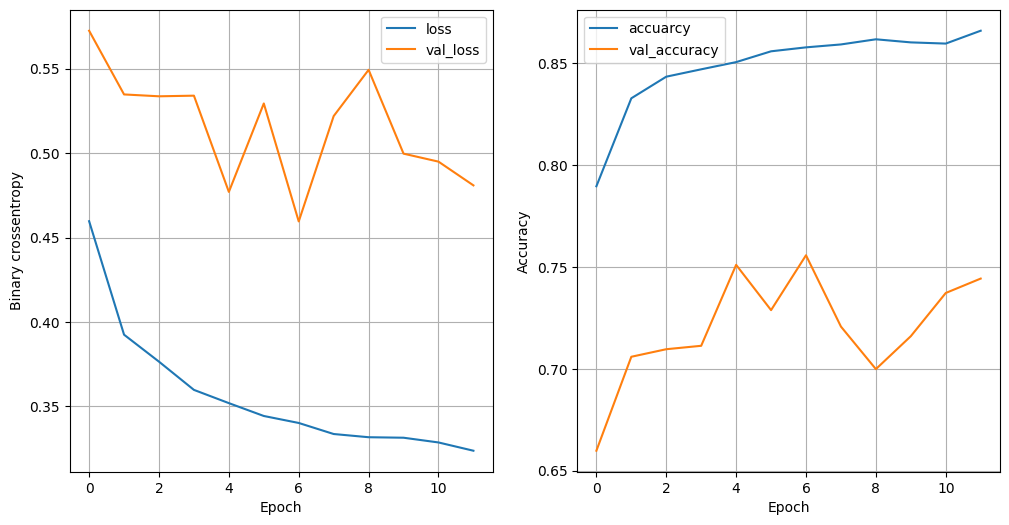

Validation Loss: 0.3325, Accuracy: 0.8549
Training with {'num_nodes': 64, 'dropout_prob': 0.2, 'learning_rate': 0.001, 'batch_size': 64}


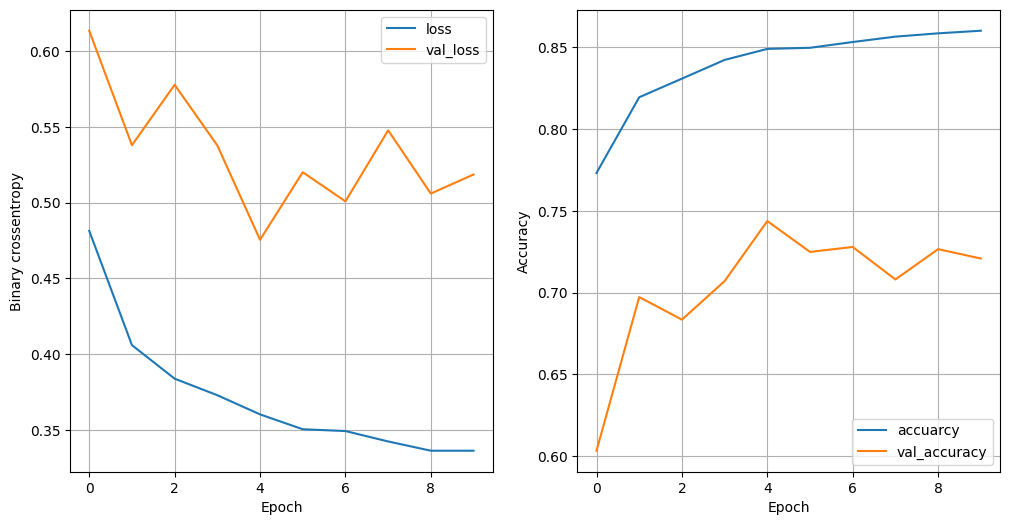

Validation Loss: 0.3484, Accuracy: 0.8546
Training with {'num_nodes': 64, 'dropout_prob': 0.2, 'learning_rate': 0.01, 'batch_size': 32}


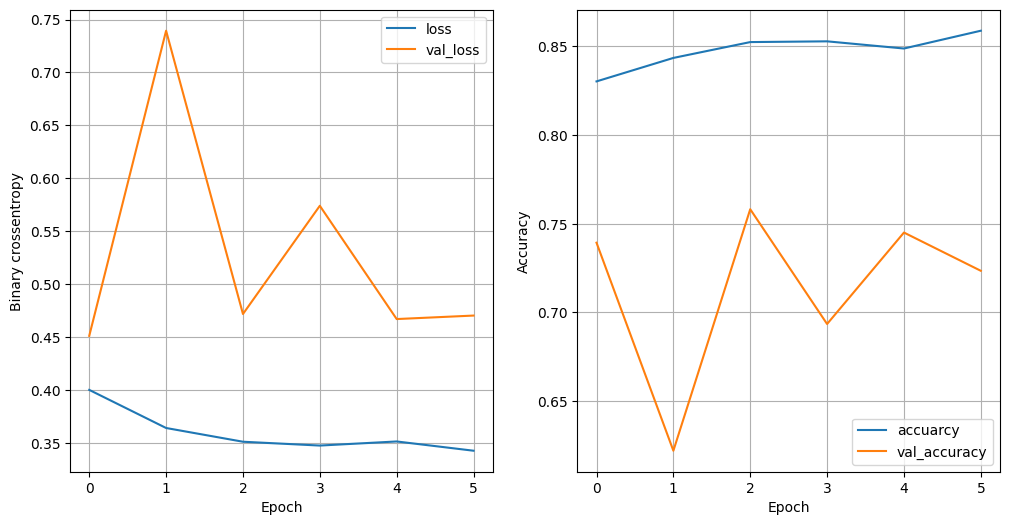

Validation Loss: 0.3779, Accuracy: 0.8431
Training with {'num_nodes': 64, 'dropout_prob': 0.2, 'learning_rate': 0.01, 'batch_size': 64}


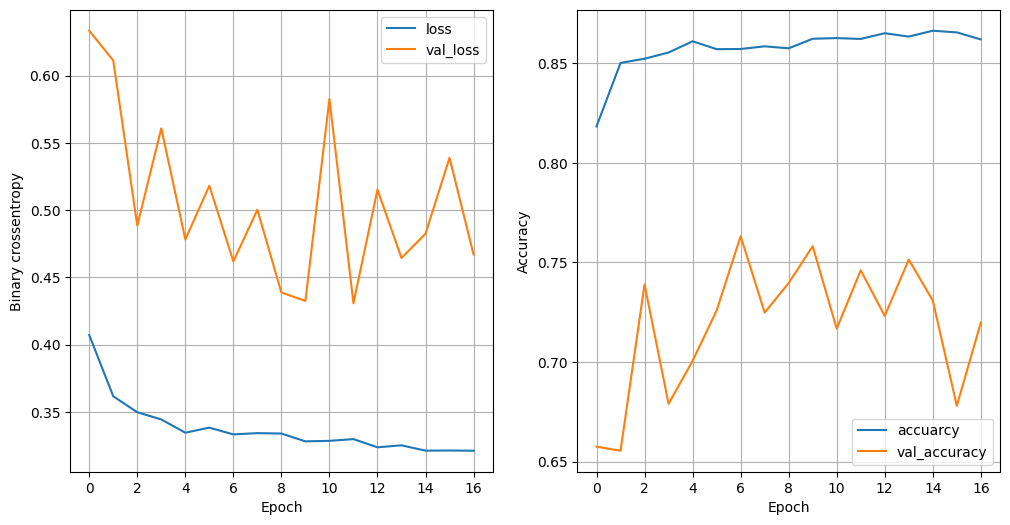

Validation Loss: 0.3250, Accuracy: 0.8680

✅ Best Params: {'num_nodes': 64, 'dropout_prob': 0.2, 'learning_rate': 0.01, 'batch_size': 64} with Loss: 0.32502567768096924


In [108]:
epochs=100 
least_val_loss=float("inf")
best_model=None 
best_params=None 
param_grid={
    "num_nodes":[32,64], 
    "dropout_prob":[0, 0.2], 
    "learning_rate":[0.001, 0.01], 
    "batch_size":[32,64]
}


# Grid search with itertools.product 
for params in itertools.product(*param_grid.values()):
    param_dict=dict(zip(param_grid.keys(), params))
    print(f"Training with {param_dict}")
    
    model, history=build_and_train( 
       X_train, y_train, **param_dict, epochs=epochs   ) 
    
      # Save plot
    plot_loss(history) 
    #plt.savefig(f"plot_{param_dict}.png")
    plt.close()
    
    val_loss, val_acc = model.evaluate(X_valid, y_valid, verbose=0)
    print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")
    
    if val_loss < least_val_loss:
        least_val_loss = val_loss
        best_model = model
        best_params = param_dict

print("\n✅ Best Params:", best_params, "with Loss:", least_val_loss)
best_model.save("best_model.h5")
    

In [109]:
y_pred=best_model.predict(X_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1348
           1       0.88      0.94      0.90      2456

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

